In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from statsmodels.tsa.seasonal import STL

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [76]:
stock = "NVDA"
ticker = yf.Ticker(stock)
data = ticker.history(start = "2020-01-01", end = "2023-12-31", interval = "1mo")["Close"]


df = pd.DataFrame({"ds": data.index, "y": data.values, "unique_id": "Close"})
df.head()

,ds,y,unique_id
0,2020-01-01 00:00:00-05:00,5.886479,Close
1,2020-02-01 00:00:00-05:00,6.724027,Close
2,2020-03-01 00:00:00-05:00,6.566866,Close
3,2020-04-01 00:00:00-04:00,7.281349,Close
4,2020-05-01 00:00:00-04:00,8.844341,Close


In [80]:
# Convert 'ds' columns in fecha_2020 and fecha_2022 to the same timezone as df['ds']
fecha_2020['ds'] = fecha_2020['ds'].dt.tz_localize("America/New_York")
fecha_2022['ds'] = fecha_2022['ds'].dt.tz_localize("America/New_York")

# Now perform the merge
df = df.merge(fecha_2020, how='left', on='ds').fillna(0)
df = df.merge(fecha_2022, how='left', on='ds').fillna(0)

In [81]:
df.head()

,ds,y,unique_id,2020_outlier,2022_outlier
0,2020-01-01 00:00:00-05:00,5.886479,Close,0.0,0.0
1,2020-02-01 00:00:00-05:00,6.724027,Close,0.0,0.0
2,2020-03-01 00:00:00-05:00,6.566866,Close,0.0,0.0
3,2020-04-01 00:00:00-04:00,7.281349,Close,0.0,0.0
4,2020-05-01 00:00:00-04:00,8.844341,Close,0.0,0.0


In [82]:
pip install statsforecast

In [83]:
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast

In [86]:
# Create a list with the model and its instantiation parameters
models = [AutoARIMA(season_length=12)]

In [87]:
sf = StatsForecast(df=df,
    models=models,
    freq='MS',
    n_jobs=1,
)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [88]:
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [89]:
from statsforecast.arima import arima_string

In [90]:
arima_string(sf.fitted_[0,0].model_)

'Regression with ARIMA(0,1,0) errors'

In [91]:
df.tail()

,ds,y,unique_id,2020_outlier,2022_outlier
43,2023-08-01 00:00:00-04:00,49.336010,Close,0.0,0.0
44,2023-09-01 00:00:00-04:00,43.482265,Close,0.0,0.0
45,2023-10-01 00:00:00-04:00,40.767666,Close,0.0,0.0
46,2023-11-01 00:00:00-04:00,46.755852,Close,0.0,0.0
47,2023-12-01 00:00:00-05:00,49.507023,Close,0.0,0.0


In [92]:
x_df = pd.DataFrame({"ds": [pd.to_datetime('2024-01-01'), pd.to_datetime('2024-02-01'), pd.to_datetime('2024-03-01')],
                     "2020_outlier": [0,0,0],
                     "2022_outlier": [0,0,0],
                     "unique_id": ["CLose", "Close", "Close"]})
x_df.head()

,ds,2020_outlier,2022_outlier,unique_id
0,2024-01-01,0,0,CLose
1,2024-02-01,0,0,Close
2,2024-03-01,0,0,Close


In [93]:
Y_hat_df = sf.forecast(3, X_df=x_df ,fitted=True)
values = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [97]:
df['autoSarimaX'] = values['AutoARIMA'].values
df.head()

,ds,y,unique_id,2020_outlier,2022_outlier,autoSarimaX
0,2020-01-01 00:00:00-05:00,5.886479,Close,0.0,0.0,5.880592
1,2020-02-01 00:00:00-05:00,6.724027,Close,0.0,0.0,5.886479
2,2020-03-01 00:00:00-05:00,6.566866,Close,0.0,0.0,6.724027
3,2020-04-01 00:00:00-04:00,7.281349,Close,0.0,0.0,6.566866
4,2020-05-01 00:00:00-04:00,8.844341,Close,0.0,0.0,7.281349


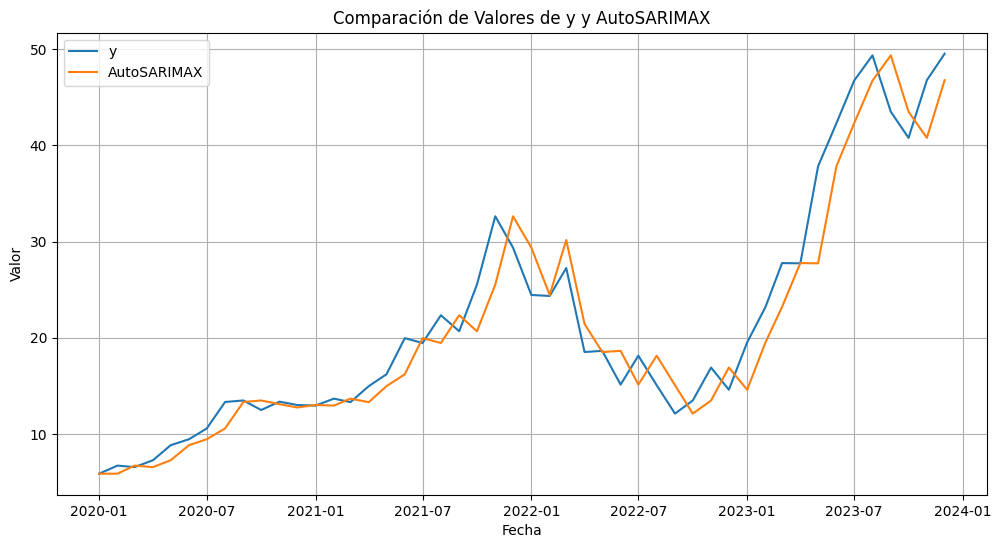

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='y')
plt.plot(df['ds'], df['autoSarimaX'], label='AutoSARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Comparación de Valores de y y AutoSARIMAX')
plt.legend()
plt.grid(True)
plt.show()